In [ ]:
!apt-get install tesseract-ocr
!pip install pytesseract
!pip install pdf2image
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 3s (1,631 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 121918 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

### Load Candidate CV

In [ ]:
cv_path = '/content/Park Gopal.pdf'

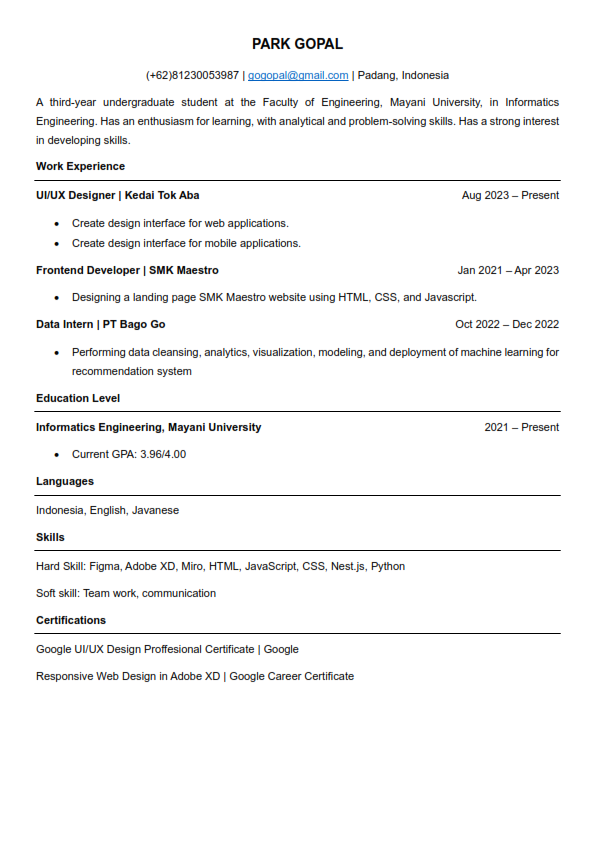

### Extract Raw Text from CV

In [ ]:
"""
This script is designed to extract text from a PDF file by converting each page of the PDF into an image and then using OCR (Optical Character Recognition) to read the text from these images. It utilizes the `pdf2image` library to convert PDF pages to images and the `pytesseract` library, a Python wrapper for Google's Tesseract-OCR Engine, to perform the OCR process.
"""

from pdf2image import convert_from_path
import numpy as np
import pytesseract


def extract_data(pdf_path):
    """
    Extracts text from a PDF file by converting each page to an image and then using OCR to read the text.

    Parameters:
    - pdf_path (str): The file path of the PDF from which to extract text.

    Returns:
    - str: A string containing all the extracted text from the PDF.
    """
    # Initialize the variable to stor the extracted text
    extracted_text = ""

    # Converts the PDF to images
    pages = convert_from_path(pdf_path, dpi=300)

    # Loop through the images and extract text
    for page in pages:
        # Automatic page segmentation with OSD
        custom_config = r'--psm 1'
        # Use Tesseract to extract text from the image
        text = pytesseract.image_to_string(np.array(page), config=custom_config)

        # Append the text to the extracted_text variable
        extracted_text += text

    # Return the extracted text
    return extracted_text

In [ ]:
text = extract_data(cv_path)

In [ ]:
text

'PARK GOPAL\n\n(+62)81230053987 | gogopal@gqmail.com | Padang, Indonesia\n\nA third-year undergraduate student at the Faculty of Engineering, Mayani University, in Informatics\nEngineering. Has an enthusiasm for learning, with analytical and problem-solving skills. Has a strong interest\n\nin developing skills.\nWork Experience\nUI/UX Designer | Kedai Tok Aba Aug 2023 — Present\n\ne Create design interface for web applications.\n\ne Create design interface for mobile applications.\n\nFrontend Developer | SMK Maestro Jan 2021 —Apr 2023\ne Designing a landing page SMK Maestro website using HTML, CSS, and Javascript.\n\nData Intern | PT Bago Go Oct 2022 — Dec 2022\n\ne Performing data cleansing, analytics, visualization, modeling, and deployment of machine learning for\n\nrecommendation system\nEducation Level\nInformatics Engineering, Mayani University 2021 — Present\ne Current GPA: 3.96/4.00\nLanguages\nIndonesia, English, Javanese\nSkills\nHard Skill: Figma, Adobe XD, Miro, HTML, JavaS

In [ ]:
"""
This script is designed to preprocessing extract text from a CV file.
"""

import re

def preprocessing(text):
    """
    Preprocesses the input text by performing various normalization and cleaning operations.

    Parameters:
    - text (str): The input text to be preprocessed.

    Returns:
    - str: The preprocessed text.
    """

    # Convert text to lowercase
    text = text.lower()

    # Strip leading/trailing whitespace
    text = text.strip()

    # Remove e
    text = re.sub(r'\be\b', '', text)

    # Remove apostrophes and double quotes
    text = text.replace("'", "")
    text = text.replace('"', '')

    # Replace newline characters, semicolons, colons, commas, and vertical bars with spaces
    text = re.sub(r'[\n;,\|]', ' ', text)

    # Replace $1 with S1
    text = re.sub(r'\$1', 'S1', text)

    # Remove "page {number}" references
    text = re.sub(r'\bpage\s\d+\b', '', text, flags=re.IGNORECASE)

    # Fix common email formatting issues
    text = re.sub(r'@gmail\s?com', '@gmail.com', text)
    text = re.sub(r'\s+@', '@', text)
    text = re.sub(r'@gmail\.co\b', '@gmail.com', text)

    # Normalize phone numbers in the +62 format with optional spaces or dashes
    text = re.sub(r'\+62\s?(\d{2,3})[ -]?(\d{3,4})[ -]?(\d{4,5})', r'+62\1\2\3', text)

    # Normalize phone numbers in the 08xx-xxxx-xxxx format and convert to +62 format
    text = re.sub(r'08(\d{2})-(\d{4})-(\d{4})', r'+628\1\2\3', text)

    # Normalize phone numbers in the (+62) xx-xxxx-xxxx format
    text = re.sub(r'\(\+62\)\s?(\d{2,3})[ -]?(\d{3,4})[ -]?(\d{4,5})', r'+62\1\2\3', text)

    # Normalize phone numbers in the (62) xx-xxxx-xxxx format
    return re.sub(r'\(62\)\s?(\d{2,3})[ -]?(\d{3,4})[ -]?(\d{4,5})', r'+62\1\2\3', text)

    # Normalize phone numbers in the +62 format with optional parentheses and spaces or dashes
    text = re.sub(r'\+62\s?(\d{2,3})[ -]?(\d{3,4})[ -]?(\d{4,5})', r'+62\1\2\3', text)

    # Convert all +62 numbers to 08 format
    text = re.sub(r'\+62(\d+)', r'08\1', text)

    # Normalize URLs with spaces to proper format
    text = re.sub(r'https\s+(\w+)\s+com', r'https://\1.com', text)

    # Normalize date ranges and formats
    text = re.sub(r'(\d{4})\s*[~=_]\s*(present)', r'\1 - \2', text)
    text = re.sub(r'(\d{4})\s*[~=_]\s*(\w+)\s*(\d{4})?', r'\1 - \2 \3', text)
    text = re.sub(r'(\d{4})\s*[_=]\s*(\w+)', r'\1 - \2', text)

    # Split text into words
    words = text.split()

    # Join words back into a single string
    text = ' '.join(words)

    return text

In [ ]:
clean_text = preprocessing(text)

In [ ]:
clean_text

'park gopal  +6281230053987   gogopal@gqmail.com   padang  indonesia  a third-year undergraduate student at the faculty of engineering  mayani university  in informatics engineering. has an enthusiasm for learning  with analytical and problem-solving skills. has a strong interest  in developing skills. work experience ui/ux designer   kedai tok aba aug 2023 — present   create design interface for web applications.   create design interface for mobile applications.  frontend developer   smk maestro jan 2021 —apr 2023  designing a landing page smk maestro website using html  css  and javascript.  data intern   pt bago go oct 2022 — dec 2022   performing data cleansing  analytics  visualization  modeling  and deployment of machine learning for  recommendation system education level informatics engineering  mayani university 2021 — present  current gpa: 3.96/4.00 languages indonesia  english  javanese skills hard skill: figma  adobe xd  miro  html  javascript  css  nest.js  python soft ski

### Get Information from CV

In [ ]:
# Install transformers from source - only needed for versions <= v4.34
%pip install git+https://github.com/huggingface/transformers.git
%pip install accelerate

  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-jmqgzoq4
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-jmqgzoq4
  Resolved https://github.com/huggingface/transformers.git to commit 14ff5dd962c1bd0a4e3adaac347ba396d8df5add
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for transformers: filename=transformers-4.42.0.dev0-py3-none-any.whl size=9140611 sha256=ffc042b2c2609ba10dfa9605d2e7a526d69295d30804a9fbf824eee24677a3b2
  Stored in directory: /tmp/pip-ephem-wheel-cache-cu1p6xb5/wheels/e7/9c/5b/e1a9c8007c343041e61cc484433d512ea9274272e3fcbe7c16
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 4.41.2
    Uninstalling transformers-4.41.2:
      Successfully uninstalled transformers-4.41.2
     ━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import torch
from transformers import pipeline

# We use Zephyr-7b-beta model from Hugging Face to generate text (it's free)
pipe = pipeline("text-generation", model="HuggingFaceH4/zephyr-7b-beta", torch_dtype=torch.bfloat16, device_map="auto")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/638 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00008.safetensors:   0%|          | 0.00/1.89G [00:00<?, ?B/s]

model-00002-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

model-00003-of-00008.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00004-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

model-00005-of-00008.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00006-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

model-00007-of-00008.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00008-of-00008.safetensors:   0%|          | 0.00/816M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.43k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/168 [00:00<?, ?B/s]

In [ ]:
"""
This script is designed to extract information from cv and returns a structured JSON.
"""

import json

def cv_to_json(text):
    """
    Extracts information from a CV text and returns it as a structured JSON object.

    Parameters:
    - text (str): The raw OCR text extracted from the CV document.

    Returns:
    - dict: A dictionary containing the extracted CV information structured in JSON format, or None if parsing fails.

    The JSON structure includes the following fields:
    - basic_info (dict): Basic information about the individual.
        - name (str): The individual's name.
        - email (str): The individual's email address.
        - phone_number (str): The individual's phone number.
        - location (str): The individual's location.
    - work_experience (list): A list of dictionaries containing work experience information.
        - job_title (str): The job title.
        - company (str): The company name.
        - location (str): The location of the company.
        - start_date (str): The start date of the job.
        - end_date (str): The end date of the job.
        - job_desc (str): A summary of the job responsibilities.
    - education (list): A list of dictionaries containing education information.
        - title (str): The title of the degree or certification.
        - institute (str): The name of the educational institution.
        - location (str): The location of the institution.
        - start_date (str): The start date of the education.
        - end_date (str): The end date of the education.
        - description (str): A description or additional information about the education.
    - languages (list): A list of languages known by the individual.
    - skills (list): A list of skills possessed by the individual.
    - certification (list): A list of dictionaries containing certification information.
        - title (str): The title of the certification.
        - issuer (str): The organization that issued the certification.
        - start_date (str): The issue date of the certification.
        - expiration_date (str): The expiration date of the certification, if applicable.
    """

    ocr_string = text

    # Define the example formats
    example_format_1 = """
    {
        "basic_info": {
            "name": "John Doe",
            "email": "john@gmail.com",
            "phone_number": "082291293453",
            "location": "Jember, Indonesia"
        },
        "work_experience": [
            {
                "job_title": "Data Science",
                "company": "PT. Teknologi Merdeka",
                "location": "Surabaya",
                "start_date": "Dec 2022",
                "end_date": "Jan 2024",
                "job_desc": "Create a model that could predict the weather. Visualize the data. Making presentation for every weeks"
            }
        ],
        "education": [
            {
                "title": "Accounting",
                "institute": "Universitas Jayanegara",
                "location": "Medan",
                "start_date": "Aug 2021",
                "end_date": "Aug 2023",
                "description": "GPA 3.46/4.00"
            }
        ],
        "languages": ["English", "Indonesia", "Sundanese"],
        "skills": ["Python", "Tensorflow", "Communication", "Presentation"],
        "certification": [
            {
                "title": "Learn Data Analytics",
                "issuer": "Gogo",
                "start_date": "2020",
                "expiration_date": "2025"
            }
        ]
    }
    """

    # Set the prompt with example formats
    question_1 = f"Extract the name of (basic_info:(name,email,phone_number,location),work_experience:[(job_title,company,location,start_date,end_date,job_summary)],education:[(title,institute,location,start_date,end_date,description)],languages:[],skills:[],certification:[(title,issuer,start_date,expiration_date)]) from this OCR data: {ocr_string}.\nReturn the information in the following JSON format, strictly using only the data provided in the document:\n{example_format_1}"

    # Process the first question
    messages_1 = [
        {
            "role": "system",
            "content": "You are a JSON converter which receives raw CV candidate information as a string and returns a structured JSON output by organising the information in the string.",
        },
        {"role": "user",
         "content": question_1},
    ]

    prompt_1 = pipe.tokenizer.apply_chat_template(messages_1, tokenize=False, add_generation_prompt=True)
    outputs_1 = pipe(prompt_1, max_new_tokens=1000, do_sample=True, temperature=0.7, top_k=50, top_p=0.95)

    # Extract the generated text and remove the prompt part
    generated_text = outputs_1[0]["generated_text"]
    answer_1 = generated_text.split(question_1)[-1].strip()

    # Clean up the JSON string (if necessary)
    try:
        # Attempt to find the JSON object within the output
        json_start = answer_1.find("{")
        json_end = answer_1.rfind("}") + 1
        json_str = answer_1[json_start:json_end]

        # Try to parse the cleaned JSON string
        json_data = json.loads(json_str)
    except json.JSONDecodeError as e:
        print("Failed to parse JSON:", e)
        print("Raw output:", answer_1)
        return None

    return json_data

In [ ]:
json_output = cv_to_json(clean_text)

In [ ]:
# Print JSON output
json_output

{'basic_info': {'name': 'Park Gopal',
  'email': 'gopal@gqmail.com',
  'phone_number': '6281230053987',
  'location': 'Padang, Indonesia'},
 'work_experience': [{'job_title': 'UI/UX Designer',
   'company': 'Kedai Tok Aba',
   'location': 'Unknown',
   'start_date': 'Aug 2023',
   'end_date': 'Present',
   'job_summary': 'Create design interface for web applications. Create design interface for mobile applications.'},
  {'job_title': ' Frontend Developer',
   'company': 'SMK Maestro',
   'location': 'Unknown',
   'start_date': 'Jan 2021',
   'end_date': 'Apr 2023',
   'job_summary': 'Designing a landing page SMK Maestro website using HTML, CSS, and JavaScript.'}],
 'education': [{'title': 'Informatics Engineering',
   'institute': 'Mayani University',
   'location': 'Unknown',
   'start_date': '2021',
   'end_date': 'Present',
   'description': 'Current GPA: 3.96/4.00'}],
 'languages': ['Indonesia', 'English', 'Javanese'],
 'skills': ['Figma',
  'Adobe XD',
  'Miro',
  'HTML',
  'CSS',

Output using Gemini

```
{
  "basic_info": {
    "name": "Park Gopal",
    "email": "gogopal@gqmail.com",
    "phone_number": "+6281230053987",
    "location": "Padang, Indonesia"
  },
  "work_experience": [
    {
      "job_title": "UI/UX Designer",
      "company": "Kedai Tok Aba",
      "location": "",
      "start_date": "Aug 2023",
      "end_date": "present",
      "job_summary": "Create design interface for web applications. Create design interface for mobile applications."
    },
    {
      "job_title": "Frontend Developer",
      "company": "SMK Maestro",
      "location": "",
      "start_date": "Jan 2021",
      "end_date": "Apr 2023",
      "job_summary": "Designing a landing page SMK Maestro website using HTML, CSS and Javascript."
    },
    {
      "job_title": "Data Intern",
      "company": "PT Bago Go",
      "location": "",
      "start_date": "Oct 2022",
      "end_date": "Dec 2022",
      "job_summary": "Performing data cleansing analytics visualization modeling and deployment of machine learning for recommendation system"
    }
  ],
  "education": [
    {
      "title": "Informatics Engineering",
      "institute": "Mayani University",
      "location": "",
      "start_date": "2021",
      "end_date": "present",
      "description": "Current GPA: 3.96/4.00"
    }
  ],
  "languages": [
    "Indonesia",
    "English",
    "Javanese"
  ],
  "skills": [
    "Figma",
    "Adobe XD",
    "Miro",
    "HTML",
    "Javascript",
    "CSS",
    "Nest.js",
    "Python",
    "Team Work",
    "Communication"
  ],
  "certifications": [
    {
      "title": "Google UI/UX Design Professional Certificate",
      "issuer": "Google",
      "start_date": "",
      "expiration_date": ""
    },
    {
      "title": "Google Responsive Web Design in Adobe XD",
      "issuer": "Google",
      "start_date": "",
      "expiration_date": ""
    },
    {
      "title": "Google Career Certificate",
      "issuer": "Google",
      "start_date": "",
      "expiration_date": ""
    }
  ]
}

```



### CV Summary

In [ ]:
pip install fpdf

  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40702 sha256=2358ad97353f6e59f2e864d5307e930be972a8549d1cc746724fcf8bfcfaf6a8
  Stored in directory: /root/.cache/pip/wheels/f9/95/ba/f418094659025eb9611f17cbcaf2334236bf39a0c3453ea455
Successfully built fpdf


In [ ]:
import io

In [ ]:
"""
This script is designed to convert the CV JSON into a readable string.
"""

def summarize(json_output):
    """
    Summarizes the CV information provided in the JSON format and formats it into a readable string.

    Parameters:
    - json_output (dict): A dictionary containing CV information. The dictionary should include the following keys:
        - basic_info (dict): Basic information about the individual.
            - name (str): The individual's name.
            - email (str): The individual's email address.
            - phone_number (str): The individual's phone number.
            - location (str): The individual's location.
        - work_experience (list): A list of dictionaries containing work experience information.
            - job_title (str): The job title.
            - company (str): The company name.
            - location (str): The location of the company.
            - start_date (str): The start date of the job.
            - end_date (str): The end date of the job.
            - job_summary (str): A summary of the job responsibilities.
        - education (list): A list of dictionaries containing education information.
            - title (str): The title of the degree or certification.
            - institute (str): The name of the educational institution.
            - location (str): The location of the institution.
            - start_date (str): The start date of the education.
            - end_date (str): The end date of the education.
            - description (str): A description or additional information about the education.
        - languages (list): A list of languages known by the individual.
        - skills (list): A list of skills possessed by the individual.
        - certifications (list): A list of dictionaries containing certification information.
            - title (str): The title of the certification.
            - issuer (str): The organization that issued the certification.
            - start_date (str): The issue date of the certification.
            - expiration_date (str): The expiration date of the certification, if applicable.

    Returns:
    - str: A formatted string containing the summarized CV information.
    """

    buffer = io.StringIO()
    # Accessing basic information
    name = json_output['basic_info']['name']
    email = json_output['basic_info']['email']
    phone_number = json_output['basic_info']['phone_number']
    location = json_output['basic_info']['location']

    buffer.write(f"Personal Information\n")
    buffer.write(f"Name: {name}\n")
    buffer.write(f"Email: {email}\n")
    buffer.write(f"Phone Number: {phone_number}\n")
    buffer.write(f"Location: {location}\n")

    # Accessing work experience
    buffer.write("\nWork Experience:\n")
    for work in json_output['work_experience']:
        job_title = work['job_title']
        company = work['company']
        work_location = work['location']
        start_date = work['start_date']
        end_date = work['end_date']
        job_summary = work['job_summary']

        buffer.write(f"{job_title} | {company}\n")
        buffer.write(f"Location: {work_location}\n")
        buffer.write(f"Duration: {start_date} - {end_date}\n")
        buffer.write(f"Job Summary: {job_summary}\n")

    # Accessing education
    buffer.write("\nEducation:\n")
    for education in json_output['education']:
        title = education['title']
        institute = education['institute']
        edu_location = education['location']
        edu_start_date = education['start_date']
        edu_end_date = education['end_date']
        description = education['description']

        buffer.write(f"{title} | {institute}\n")
        buffer.write(f"Location: {edu_location}\n")
        buffer.write(f"Duration: {edu_start_date} - {edu_end_date}\n")
        buffer.write(f"Description: {description}\n")

    # Accessing languages
    languages = json_output['languages']
    buffer.write("\nLanguages:\n")
    buffer.write(f"{', '.join(languages)}\n")

    # Accessing skills
    skills = json_output['skills']
    buffer.write("\nSkills:\n")
    buffer.write(f"{', '.join(skills)}\n")

    # Accessing certifications
    buffer.write("\nCertifications:\n")
    for cert in json_output['certifications']:
        cert_title = cert['title']
        issuer = cert['issuer']
        cert_start_date = cert['start_date']
        expiration_date = cert['expiration_date']

        buffer.write(f"{cert_title} | {issuer}\n")
        buffer.write(f"Issued date: {cert_start_date} - {expiration_date}\n")

    # Get the formatted string
    formatted_cv = buffer.getvalue()
    buffer.close()
    return formatted_cv

In [ ]:
"""
This script is designed to convert the string into a PDF file.
"""

from fpdf import FPDF

def string_to_pdf(text, filename):
    """
    Converts a string of text into a PDF file.

    Parameters:
    - text (str): The text content to be included in the PDF.
    - filename (str): The name of the output PDF file.

    Raises:
    - ValueError: If the text parameter is None or empty.

    Example:
    >>> text = "This is a sample text to be converted into a PDF."
    >>> filename = "output.pdf"
    >>> string_to_pdf(text, filename)
    """

    if not text:
        raise ValueError("The text parameter cannot be None or empty")

    # Create instance of FPDF class
    pdf = FPDF()

    # Add a page
    pdf.add_page()

    # Set font
    pdf.set_font("Arial", size=11)

    # Add a multi-line cell
    pdf.multi_cell(0, 7, text)

    # Save the PDF with the specified filename
    pdf.output(filename)

In [ ]:
cv_summary = summarize(json_output)

In [ ]:
string_to_pdf(cv_summary, "summary_gopal.pdf")